In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.style.use("default")

In [2]:
df = pd.read_csv("hour.csv")
df.head(2)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40


In [3]:
my_df = df.drop(["instant", "dteday", "casual", "registered"], axis=1)
my_df.head(2)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40


In [4]:
abs(my_df.corr())["cnt"].sort_values(ascending=False)

cnt           1.000000
temp          0.404772
atemp         0.400929
hr            0.394071
hum           0.322911
yr            0.250495
season        0.178056
weathersit    0.142426
mnth          0.120638
windspeed     0.093234
holiday       0.030927
workingday    0.030284
weekday       0.026900
Name: cnt, dtype: float64

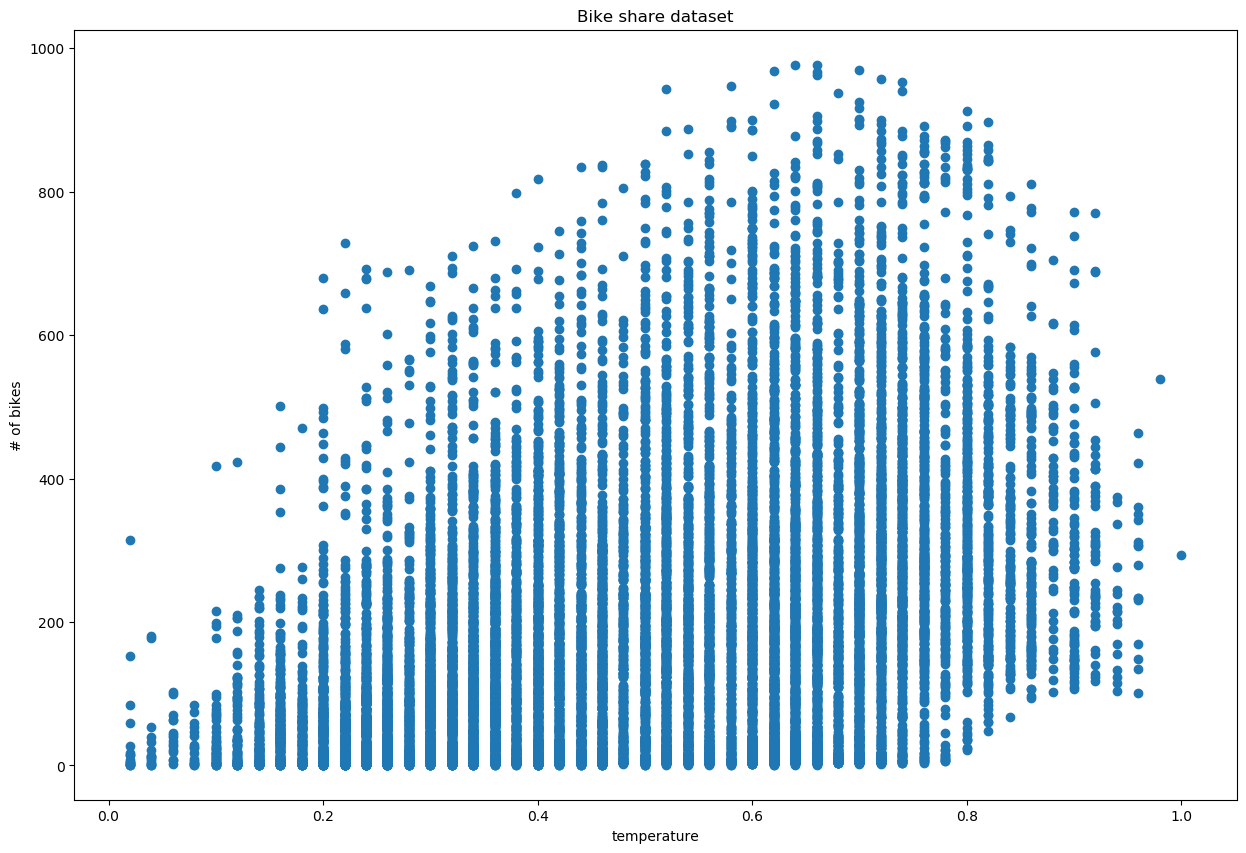

In [11]:
plt.figure(figsize=(15,10))
plt.scatter(x=my_df["temp"], y=my_df["cnt"])
plt.xlabel("temperature")
plt.ylabel("# of bikes")
plt.title("Bike share dataset")
plt.show()

In [75]:
X = my_df["temp"].values.reshape(-1,1)
y = my_df["cnt"].values.reshape(-1,1)

In [38]:
X[:3], y[:3]

(array([[0.24],
        [0.22],
        [0.22]]), array([[16],
        [40],
        [32]], dtype=int64))

In [4]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [40]:
X_train.shape, y_train.shape

((13903, 1), (13903, 1))

In [77]:
y_train = y_train.reshape(len(y_train),)
y_test = y_test.reshape(len(y_test),)

In [42]:
y_train.shape

(13903,)

In [5]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [70]:
X[:3], y[:3]

(array([[-1.33464759],
        [-1.4385164 ],
        [-1.4385164 ]]), array([[-0.95633924],
        [-0.82402209],
        [-0.8681278 ]]))

In [78]:
regressor = SVR(kernel = 'rbf', degree=3, C=100)
regressor.fit(X_train, y_train)

SVR(C=100)

In [79]:
y_pred = regressor.predict(X_test)

In [80]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [81]:
mse, mae, rmse, r2

(29179.34705141958,
 122.61416986829576,
 170.81963309707575,
 0.14748882074134517)

### Boosting

In [6]:
from sklearn.ensemble import AdaBoostRegressor

In [6]:
X = my_df.drop("cnt", axis=1)
y = my_df.cnt

In [7]:
X = X.values
y = y.values

In [90]:
y[:5]

array([16, 40, 32, 13,  1], dtype=int64)

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [92]:
clf = SVR()
clf.fit(X_train, y_train)

SVR()

In [94]:
boosted_svr = AdaBoostRegressor(SVR(), n_estimators=10, random_state=12)
boosted_svr.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=SVR(), n_estimators=10, random_state=12)

In [95]:
standard_r2 = clf.score(X_test, y_test)
boosted_r2 = boosted_svr.score(X_test, y_test)

print(f"Standard SVR Test Set R^2: {standard_r2}")
print(f"Boosted SVR Test Set R^2: {boosted_r2}")

Standard SVR Test Set R^2: 0.3677796859769705
Boosted SVR Test Set R^2: 0.44434021557186076


### Hyperparameter tuning for `SVR()`

In [8]:
from sklearn.model_selection import GridSearchCV

In [16]:
estimator = SVR(gamma="auto")
param_grid = {
    "C": [1, 5, 10, 20],
    "kernel": ["rbf", "linear"],
    "epsilon": [0.1, 0.2]
}

model = GridSearchCV(estimator, param_grid, cv=5)
model.fit(X, y)

GridSearchCV(cv=5, estimator=SVR(gamma='auto'),
             param_grid={'C': [1, 5, 10, 20], 'epsilon': [0.1, 0.2],
                         'kernel': ['rbf', 'linear']})

In [17]:
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_epsilon,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,18.531961,0.847030,2.401833,0.091752,1,0.1,rbf,"{'C': 1, 'epsilon': 0.1, 'kernel': 'rbf'}",0.396244,0.665277,0.407460,0.269760,0.250775,0.397903,0.148088,8
1,14.279811,1.091623,1.030213,0.150262,1,0.1,linear,"{'C': 1, 'epsilon': 0.1, 'kernel': 'linear'}",0.188914,0.343923,0.200442,0.198261,0.190929,0.224494,0.059871,10
2,17.409821,0.294971,2.431997,0.027256,1,0.2,rbf,"{'C': 1, 'epsilon': 0.2, 'kernel': 'rbf'}",0.396537,0.665279,0.407520,0.269863,0.250886,0.398017,0.148049,7
3,14.578445,0.817374,1.049398,0.164566,1,0.2,linear,"{'C': 1, 'epsilon': 0.2, 'kernel': 'linear'}",0.189196,0.343888,0.200418,0.198401,0.191111,0.224603,0.059793,9
4,17.717244,0.899791,2.412208,0.016053,5,0.1,rbf,"{'C': 5, 'epsilon': 0.1, 'kernel': 'rbf'}",0.391135,0.738318,0.572318,0.576403,0.480560,0.551747,0.115502,5
5,19.850220,1.278497,0.948656,0.011581,5,0.1,linear,"{'C': 5, 'epsilon': 0.1, 'kernel': 'linear'}",0.166582,0.344494,0.189550,0.219765,0.197288,0.223536,0.062821,12
6,17.404410,0.768704,2.398233,0.014531,5,0.2,rbf,"{'C': 5, 'epsilon': 0.2, 'kernel': 'rbf'}",0.391049,0.738374,0.572160,0.576381,0.480487,0.551690,0.115547,6
7,18.531178,0.671463,0.942651,0.071936,5,0.2,linear,"{'C': 5, 'epsilon': 0.2, 'kernel': 'linear'}",0.166378,0.344459,0.189636,0.219836,0.197473,0.223557,0.062820,11
8,16.559509,0.403991,2.453592,0.311382,10,0.1,rbf,"{'C': 10, 'epsilon': 0.1, 'kernel': 'rbf'}",0.409789,0.779799,0.655272,0.666326,0.557437,0.613725,0.123961,3
9,25.470789,1.896274,0.960849,0.036035,10,0.1,linear,"{'C': 10, 'epsilon': 0.1, 'kernel': 'linear'}",0.157114,0.343648,0.185511,0.222223,0.197677,0.221235,0.064697,13


In [18]:
pd.DataFrame(model.cv_results_)[["param_C", "param_epsilon", "param_kernel", "mean_test_score"]]

,param_C,param_epsilon,param_kernel,mean_test_score
0,1,0.1,rbf,0.397903
1,1,0.1,linear,0.224494
2,1,0.2,rbf,0.398017
3,1,0.2,linear,0.224603
4,5,0.1,rbf,0.551747
5,5,0.1,linear,0.223536
6,5,0.2,rbf,0.551690
7,5,0.2,linear,0.223557
8,10,0.1,rbf,0.613725
9,10,0.1,linear,0.221235


In [25]:
model.best_params_

{'C': 20, 'epsilon': 0.1, 'kernel': 'rbf'}

As it can be seen that, when value of `epsilon=0.1` and `kernale="rbf"`, the score is higher than the other `epsilon` and `kernel` values

The score increases with the `C` value. So it needs to check again for higher `C` values. But I'm not doing it again, my laptops's computation power is not that good. It took almost half an hour to fit the model 😥😥

In [16]:
# checking score for random test value
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# model.score(X_test, y_test)

Now again try with `AdaBoostRegressor`

In [5]:
from sklearn.ensemble import AdaBoostRegressor

In [10]:
# base_estimator = SVR(kernel="rbf", gamma="auto", C=20)
# boost = AdaBoostRegressor(base_estimator)
# param_grid = {
#     "n_estimators": [10, 50, 100],
#     "learning_rate": [0.01, 0.1, 1.0],
# }

# boost_model = GridSearchCV(boost, param_grid, cv=5)
# boost_model.fit(X, y)

In [11]:
# base_estimator = SVR(kernel="rbf", gamma="auto", C=20)
# boost = AdaBoostRegressor(base_estimator)
# boost.fit(X, y)

AdaBoostRegressor(base_estimator=SVR(C=20, gamma='auto'))

In [12]:
dir(boost)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_boost',
 '_check_X',
 '_check_n_features',
 '_estimator_type',
 '_get_median_predict',
 '_get_param_names',
 '_get_tags',
 '_make_estimator',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_validate_data',
 '_validate_estimator',
 'base_estimator',
 'base_estimator_',
 'estimator_errors_',
 'estimator_params',
 'estimator_weights_',
 'estimators_',
 'feature_importances_',
 'fit',
 'get_params',
 'learning_rate',
 'loss',
 'n_estimators

In [17]:
boost.score(X_test, y_test)

0.8653803670874121

`Adaboost` is very slow, try `xgboost`

In [9]:
import xgboost as xgb

In [10]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [15]:
params = {"objective":"reg:squarederror", "colsample_bytree": 0.3, "learning_rate": 0.1,
          "max_depth": 5, "alpha": 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, shuffle=True, nfold=5,
                    num_boost_round=50, early_stopping_rounds=10, metrics="rmse", 
                    as_pandas=True, seed=123)

In [16]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,241.405255,0.311603,241.406006,1.250826
1,225.714816,1.802525,225.824109,2.519715
2,212.071955,1.810487,212.179978,0.935939
3,200.532910,2.665994,200.707040,2.540245
4,190.550272,3.399570,190.765439,2.835343


In [17]:
cv_results.tail(3)

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
47,85.176939,4.134421,86.941852,4.530965
48,84.942682,4.119201,86.739004,4.536470
49,84.742450,4.108313,86.561658,4.561390
